In [138]:
import pandas as pd
data = pd.read_csv(r"E:\\Data Science\\Datasets\\New_IITR_Final_Data.csv")
data = data.iloc[:,0:26]
data

,file_name,raw_text,nutrientlist,foodlist,enhancelist,inhibitlist,manual_nutrientlist,manual_foodlist,NoChange
0,22467443.pdf,Paracrine factors of mesenchymal stem cells re...,precursor,heart,enhance,NaN,precursor,heart,NaN
1,32963320.pdf,open Rhizobacterial species richness improves ...,off,sorghum,enhance,NaN,off,sorghum,NaN
2,32963320.pdf,") levels, suppressing soil-borne pathogens (vi...","antibiotic, cyanide","barley, sorghum, corn, cereal, rice, wheat",NaN,suppress,"antibiotic, cyanide","barley, sorghum, corn, cereal, rice, wheat",NaN
3,32963320.pdf,We mapped these results against the metrics of...,merit,sorghum,enhance,NaN,merit,sorghum,NaN
4,32963320.pdf,While increasing the species diversity of rhiz...,merit,fig,enhance,NaN,merit,fig,NaN
...,...,...,...,...,...,...,...,...,...
410245,2926322.pdf,The purified molecule (a) reacts with elastase...,"carbohydrate, peptide",fig,NaN,inhibit,"carbohydrate, peptide",fig,NaN
410246,2926322.pdf,The elastase inhibitor can be distinguished fr...,"acetamide, protein",pig,NaN,inhibit,"acetamide, protein",pig,NaN
410247,26547194.pdf,Cadmium can be easily absorbed by plant roots ...,"water, nitrogen, mineral",water,enhance,inhibit,"water, nitrogen, mineral",water,0.0
410248,33673460.pdf,Palmitic and palmitoleic acid contents were as...,"acid, oleic, palmitic, palmitoleic","pig, pork",enhance,NaN,"acid, oleic, palmitic, palmitoleic","pig, pork",NaN


In [139]:
import numpy as np
data.loc[data["enhancelist"].notnull() & data["inhibitlist"].notnull(), "NoChange"] = 0
data.to_csv("E:\\Data Science\\Datasets\\New_IITR_Final_Data.csv", index =False)
data


,file_name,raw_text,nutrientlist,foodlist,enhancelist,inhibitlist,manual_nutrientlist,manual_foodlist,NoChange
0,22467443.pdf,Paracrine factors of mesenchymal stem cells re...,precursor,heart,enhance,NaN,precursor,heart,NaN
1,32963320.pdf,open Rhizobacterial species richness improves ...,off,sorghum,enhance,NaN,off,sorghum,NaN
2,32963320.pdf,") levels, suppressing soil-borne pathogens (vi...","antibiotic, cyanide","barley, sorghum, corn, cereal, rice, wheat",NaN,suppress,"antibiotic, cyanide","barley, sorghum, corn, cereal, rice, wheat",NaN
3,32963320.pdf,We mapped these results against the metrics of...,merit,sorghum,enhance,NaN,merit,sorghum,NaN
4,32963320.pdf,While increasing the species diversity of rhiz...,merit,fig,enhance,NaN,merit,fig,NaN
...,...,...,...,...,...,...,...,...,...
410245,2926322.pdf,The purified molecule (a) reacts with elastase...,"carbohydrate, peptide",fig,NaN,inhibit,"carbohydrate, peptide",fig,NaN
410246,2926322.pdf,The elastase inhibitor can be distinguished fr...,"acetamide, protein",pig,NaN,inhibit,"acetamide, protein",pig,NaN
410247,26547194.pdf,Cadmium can be easily absorbed by plant roots ...,"water, nitrogen, mineral",water,enhance,inhibit,"water, nitrogen, mineral",water,0.0
410248,33673460.pdf,Palmitic and palmitoleic acid contents were as...,"acid, oleic, palmitic, palmitoleic","pig, pork",enhance,NaN,"acid, oleic, palmitic, palmitoleic","pig, pork",NaN


In [140]:
def change_it(text):
    if str(text) != "nan":
        x = [i for i in text.split(",")]
        return len(x)
    else:
        return 0
z = pd.DataFrame()
z["a"] = data["nutrientlist"].apply(change_it)
z["b"] = data["foodlist"].apply(change_it)
z["c"] = z["a"]+z["b"]
new_data = data.loc[z["a"]==1,:]
new_data = new_data.loc[z["b"]==1,:]

new_data = new_data.loc[new_data["NoChange"]!=0,:]
new_data

,file_name,raw_text,nutrientlist,foodlist,enhancelist,inhibitlist,manual_nutrientlist,manual_foodlist,NoChange
0,22467443.pdf,Paracrine factors of mesenchymal stem cells re...,precursor,heart,enhance,NaN,precursor,heart,NaN
1,32963320.pdf,open Rhizobacterial species richness improves ...,off,sorghum,enhance,NaN,off,sorghum,NaN
3,32963320.pdf,We mapped these results against the metrics of...,merit,sorghum,enhance,NaN,merit,sorghum,NaN
4,32963320.pdf,While increasing the species diversity of rhiz...,merit,fig,enhance,NaN,merit,fig,NaN
6,32963320.pdf,Microbial consortia: promising probiotics as p...,nitrogen,sorghum,enhance,NaN,nitrogen,sorghum,NaN
...,...,...,...,...,...,...,...,...,...
410010,6308066.pdf,Very high enzyme activities are found in the s...,hypertensin,rabbit,raise,NaN,hypertensin,rabbit,NaN
410047,9559695.pdf,Just as tension band repair of elbow and patel...,titanium,soft,enhance,NaN,titanium,soft,NaN
410147,1516159.pdf,Indeed LP-805 not only inhibits the contractio...,caffeine,rabbit,NaN,inhibit,caffeine,rabbit,NaN
410149,1516159.pdf,"Abia A, Lobaton CD, Moreno A, Garcia-Sancho Jr...",nitrate,pig,NaN,inhibit,nitrate,pig,NaN


In [141]:
def change_it(text):
    if str(text) != "nan":
        return "enhance"
    else:
        return "nan"

new_data["enhancelist"] = new_data["enhancelist"].apply(change_it)
new_data

,file_name,raw_text,nutrientlist,foodlist,enhancelist,inhibitlist,manual_nutrientlist,manual_foodlist,NoChange
0,22467443.pdf,Paracrine factors of mesenchymal stem cells re...,precursor,heart,enhance,NaN,precursor,heart,NaN
1,32963320.pdf,open Rhizobacterial species richness improves ...,off,sorghum,enhance,NaN,off,sorghum,NaN
3,32963320.pdf,We mapped these results against the metrics of...,merit,sorghum,enhance,NaN,merit,sorghum,NaN
4,32963320.pdf,While increasing the species diversity of rhiz...,merit,fig,enhance,NaN,merit,fig,NaN
6,32963320.pdf,Microbial consortia: promising probiotics as p...,nitrogen,sorghum,enhance,NaN,nitrogen,sorghum,NaN
...,...,...,...,...,...,...,...,...,...
410010,6308066.pdf,Very high enzyme activities are found in the s...,hypertensin,rabbit,enhance,NaN,hypertensin,rabbit,NaN
410047,9559695.pdf,Just as tension band repair of elbow and patel...,titanium,soft,enhance,NaN,titanium,soft,NaN
410147,1516159.pdf,Indeed LP-805 not only inhibits the contractio...,caffeine,rabbit,nan,inhibit,caffeine,rabbit,NaN
410149,1516159.pdf,"Abia A, Lobaton CD, Moreno A, Garcia-Sancho Jr...",nitrate,pig,nan,inhibit,nitrate,pig,NaN


In [142]:
def change_it(text):
    if str(text) != "nan":
        return "inhibit"
    else:
        return "nan"

new_data["inhibitlist"] = new_data["inhibitlist"].apply(change_it)
new_data

,file_name,raw_text,nutrientlist,foodlist,enhancelist,inhibitlist,manual_nutrientlist,manual_foodlist,NoChange
0,22467443.pdf,Paracrine factors of mesenchymal stem cells re...,precursor,heart,enhance,nan,precursor,heart,NaN
1,32963320.pdf,open Rhizobacterial species richness improves ...,off,sorghum,enhance,nan,off,sorghum,NaN
3,32963320.pdf,We mapped these results against the metrics of...,merit,sorghum,enhance,nan,merit,sorghum,NaN
4,32963320.pdf,While increasing the species diversity of rhiz...,merit,fig,enhance,nan,merit,fig,NaN
6,32963320.pdf,Microbial consortia: promising probiotics as p...,nitrogen,sorghum,enhance,nan,nitrogen,sorghum,NaN
...,...,...,...,...,...,...,...,...,...
410010,6308066.pdf,Very high enzyme activities are found in the s...,hypertensin,rabbit,enhance,nan,hypertensin,rabbit,NaN
410047,9559695.pdf,Just as tension band repair of elbow and patel...,titanium,soft,enhance,nan,titanium,soft,NaN
410147,1516159.pdf,Indeed LP-805 not only inhibits the contractio...,caffeine,rabbit,nan,inhibit,caffeine,rabbit,NaN
410149,1516159.pdf,"Abia A, Lobaton CD, Moreno A, Garcia-Sancho Jr...",nitrate,pig,nan,inhibit,nitrate,pig,NaN


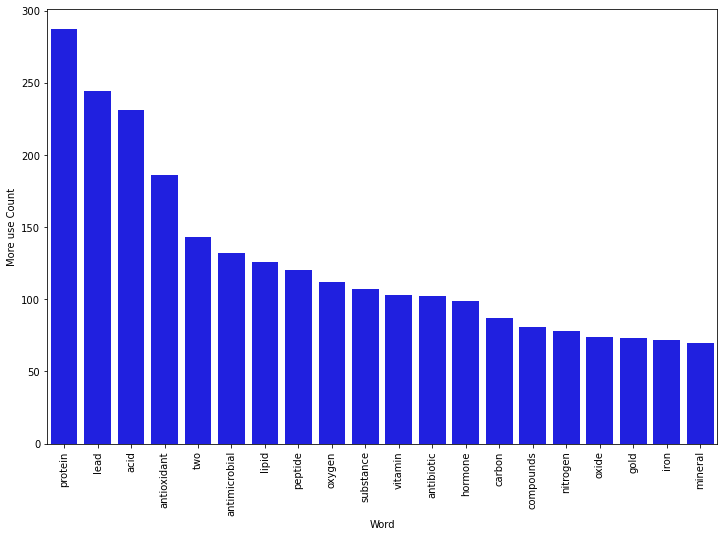

In [143]:
# Most frequent words counter
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

def counter(text, column_text, quantity, label):
    all_words = ' '.join([i for i in text[column_text]])
    all_words_as_list = all_words.split()
    
    frequency = nltk.FreqDist(all_words_as_list)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = label + " Count")
    plt.xticks(rotation='vertical')
    plt.show()
    


counter(new_data, "nutrientlist", 20, "More use")

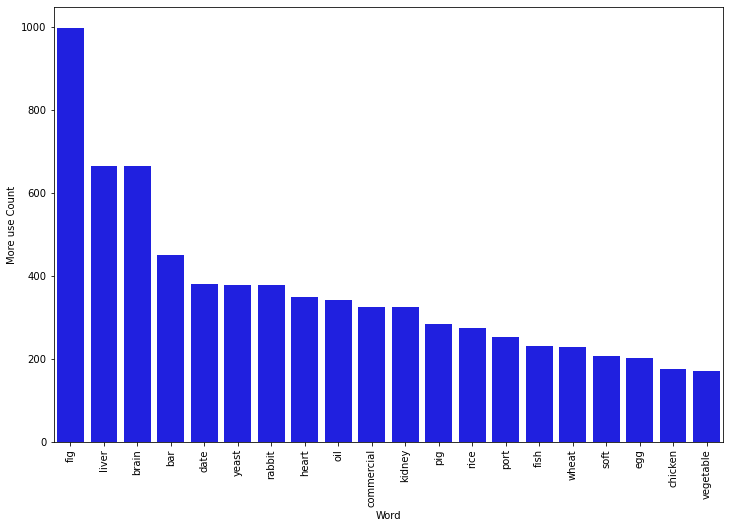

In [144]:
# Most frequent words counter
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

def counter(text, column_text, quantity, label):
    all_words = ' '.join([i for i in text[column_text]])
    all_words_as_list = all_words.split()
    
    frequency = nltk.FreqDist(all_words_as_list)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = label + " Count")
    plt.xticks(rotation='vertical')
    plt.show()
    


counter(new_data, "foodlist", 20, "More use")

Thought of double checking or removing
words like "fig, Commercial" from Foodlist, dropping words like "Acid, Two, Substance, Vitamin" from Nutrientlist

In [145]:
new_data["row"] = np.arange(len(new_data))
new_data

,file_name,raw_text,nutrientlist,foodlist,enhancelist,inhibitlist,manual_nutrientlist,manual_foodlist,NoChange,row
0,22467443.pdf,Paracrine factors of mesenchymal stem cells re...,precursor,heart,enhance,nan,precursor,heart,NaN,0
1,32963320.pdf,open Rhizobacterial species richness improves ...,off,sorghum,enhance,nan,off,sorghum,NaN,1
3,32963320.pdf,We mapped these results against the metrics of...,merit,sorghum,enhance,nan,merit,sorghum,NaN,2
4,32963320.pdf,While increasing the species diversity of rhiz...,merit,fig,enhance,nan,merit,fig,NaN,3
6,32963320.pdf,Microbial consortia: promising probiotics as p...,nitrogen,sorghum,enhance,nan,nitrogen,sorghum,NaN,4
...,...,...,...,...,...,...,...,...,...,...
410010,6308066.pdf,Very high enzyme activities are found in the s...,hypertensin,rabbit,enhance,nan,hypertensin,rabbit,NaN,15672
410047,9559695.pdf,Just as tension band repair of elbow and patel...,titanium,soft,enhance,nan,titanium,soft,NaN,15673
410147,1516159.pdf,Indeed LP-805 not only inhibits the contractio...,caffeine,rabbit,nan,inhibit,caffeine,rabbit,NaN,15674
410149,1516159.pdf,"Abia A, Lobaton CD, Moreno A, Garcia-Sancho Jr...",nitrate,pig,nan,inhibit,nitrate,pig,NaN,15675


In [146]:
a = new_data.iloc[0:10,:]
a

,file_name,raw_text,nutrientlist,foodlist,enhancelist,inhibitlist,manual_nutrientlist,manual_foodlist,NoChange,row
0,22467443.pdf,Paracrine factors of mesenchymal stem cells re...,precursor,heart,enhance,nan,precursor,heart,NaN,0
1,32963320.pdf,open Rhizobacterial species richness improves ...,off,sorghum,enhance,nan,off,sorghum,NaN,1
3,32963320.pdf,We mapped these results against the metrics of...,merit,sorghum,enhance,nan,merit,sorghum,NaN,2
4,32963320.pdf,While increasing the species diversity of rhiz...,merit,fig,enhance,nan,merit,fig,NaN,3
6,32963320.pdf,Microbial consortia: promising probiotics as p...,nitrogen,sorghum,enhance,nan,nitrogen,sorghum,NaN,4
15,32963320.pdf,Intraspecific and interspecific pair-wise seed...,malate,alfalfa,enhance,nan,malate,alfalfa,NaN,5
19,31887216.pdf,The effect of acrolein and RSL3 treatment on t...,acrolein,fig,enhance,nan,acrolein,fig,NaN,6
20,31887216.pdf,[10] who found that heat stress induced FCD co...,lipid,fig,enhance,nan,lipid,fig,NaN,7
30,26278240.pdf,indicates that Modeling the eﬀect of the QD si...,energy,energy,nan,inhibit,energy,energy,NaN,8
34,26939080.pdf,"g005 of the synapse is low, the first presynap...",lead,fig,nan,inhibit,lead,fig,NaN,9


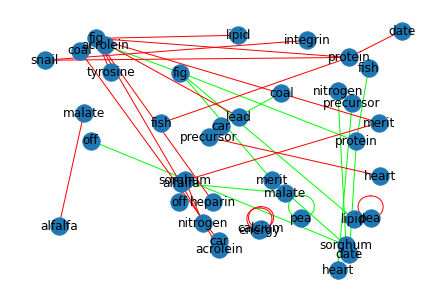

In [163]:
import networkx as nx


G = nx.Graph()
a = new_data.iloc[0:20,:]
x = list(a["nutrientlist"].values)
y = list(a["foodlist"].values)
for i in range(len(x)):
    if a.iloc[i,4] == "enhance":
        if (x[i] not in G.nodes()) and (y[i] not in G.nodes()):
            G.add_node(x[i])
            G.add_node(y[i])
        if G.has_edge(x[i],y[i])==0:
            G.add_edge(x[i], y[i])
        else:
            continue
options = {"edge_color": "#00FF00"}
nx.draw(G, pos=nx.random_layout(G), with_labels =1, **options)
for i in range(len(x)):
    if a.iloc[i,5] == "inhibit":
        if (x[i] not in G.nodes()) and (y[i] not in G.nodes()):
            G.add_node(x[i])
            G.add_node(y[i])
        if G.has_edge(x[i],y[i])==0:
            G.add_edge(x[i], y[i])
        else:
            continue
options = {"edge_color": "#FF0000"}
nx.draw(G, pos=nx.random_layout(G), with_labels =1, **options)